In [1]:
import yfinance as yf
import pandas as pd
import time
import matplotlib.pyplot as plt

# List of tickers for Indian IT companies
tickers = ['TCS.NS', 'INFY.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS']  # Add more tickers as needed

# Create a list to store individual DataFrames
dataframes = []

# Loop through each ticker and fetch the historical data
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="1y")  # Fetch historical data for the last year
        
        # Reset index to make date a column
        hist.reset_index(inplace=True)
        
        # Add a column for the ticker symbol
        hist['Ticker'] = ticker
        
        # Append the DataFrame to the list
        dataframes.append(hist)
        
        # Sleep for a short time to avoid hitting API limits
        time.sleep(1)

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Concatenate all DataFrames into a single DataFrame
all_hist = pd.concat(dataframes, ignore_index=True)

# Print the combined historical market data
print(all_hist)

# Export the data to a CSV file
all_hist.to_csv('it_stocks_historical_data.csv', index=False)

print("Data exported to it_stocks_historical_data.csv")


                          Date         Open         High          Low  \
0    2023-10-09 00:00:00+05:30  3592.740765  3626.203508  3578.892345   
1    2023-10-10 00:00:00+05:30  3587.812399  3595.648261  3549.667823   
2    2023-10-11 00:00:00+05:30  3597.619600  3597.619600  3553.265386   
3    2023-10-12 00:00:00+05:30  3523.695939  3537.149954  3487.325579   
4    2023-10-13 00:00:00+05:30  3479.341845  3525.667360  3474.413599   
...                        ...          ...          ...          ...   
1225 2024-10-03 00:00:00+05:30  1615.000000  1631.150024  1596.150024   
1226 2024-10-04 00:00:00+05:30  1591.000000  1648.400024  1591.000000   
1227 2024-10-07 00:00:00+05:30  1624.949951  1632.050049  1600.199951   
1228 2024-10-08 00:00:00+05:30  1625.000000  1635.000000  1603.599976   
1229 2024-10-09 00:00:00+05:30  1639.000000  1669.800049  1632.050049   

            Close   Volume  Dividends  Stock Splits    Ticker  
0     3586.136963  4233074        0.0           0.0    TCS.

In [2]:
data_load = pd.read_csv('it_stocks_historical_data.csv')

In [3]:
data_load.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object

In [4]:
data_load['Date'] = pd.to_datetime(data_load['Date'])
data_load['Date'].head(1)
data_load['Date'] = data_load['Date'].dt.strftime('%Y-%m-%d')

data_load['Date'].head(1)
data_load['Date'] = pd.to_datetime(data_load['Date'])
data_load['Date'].head(1)

0   2023-10-09
Name: Date, dtype: datetime64[ns]

In [5]:
data_load.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2023-10-09,3592.740765,3626.203508,3578.892345,3586.136963,4233074,0.0,0.0,TCS.NS
1,2023-10-10,3587.812399,3595.648261,3549.667823,3576.822266,1848148,0.0,0.0,TCS.NS


## 1. **What is the trend of closing prices for each bank over the last year?**


In [6]:
df_1 = data_load
df_1.reset_index()
df_1.set_index('Date', inplace=True)

In [7]:
df_1.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Ticker'],
      dtype='object')

In [8]:
df_1 = df_1.groupby('Ticker').resample('ME').first()

In [9]:
df_1 = df_1[['Open','High','Low','Close', 'Volume']]
df_1.reset_index('Ticker', inplace=True)

In [10]:
df_1['Ticker'].unique()

array(['HCLTECH.NS', 'INFY.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype=object)

In [11]:

start_date = '2023-10-31'  # Replace with your start date
end_date = '2024-09-30'    # Replace with your end date



In [12]:
df_1[(df_1['Ticker'] == 'HCLTECH.NS') & (df_1.index >= start_date) &(df_1.index <= end_date)]

df_1['Ticker'].unique()

array(['HCLTECH.NS', 'INFY.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype=object)

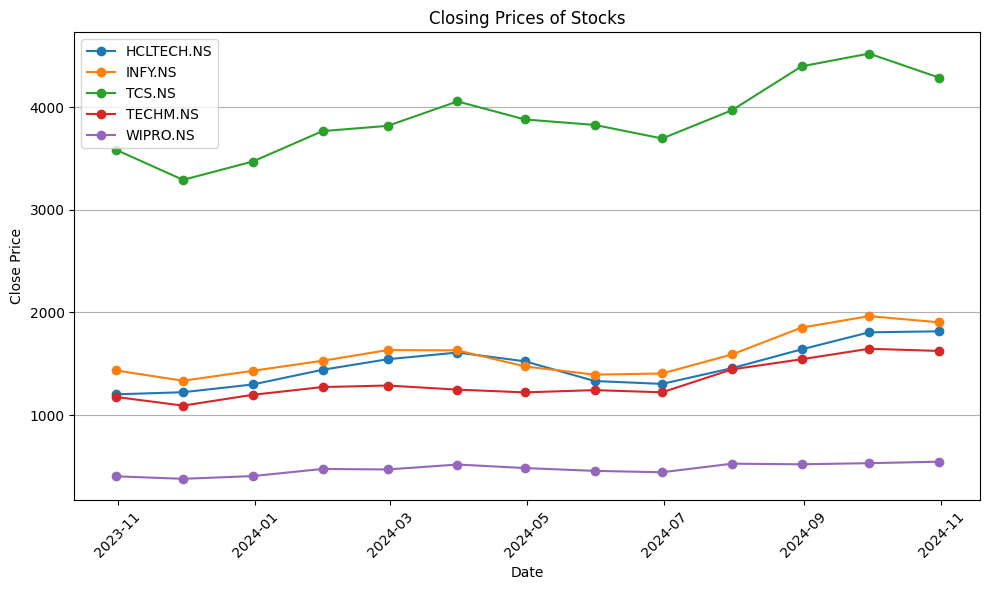

In [13]:
plt.figure(figsize=(10, 6))
for ticker in df_1['Ticker'].unique():
    subset = df_1[df_1['Ticker'] == ticker]
    plt.plot(subset.index, subset['Close'], label=ticker, marker = 'o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices of Stocks')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.legend()  
plt.tight_layout()
plt.show()


### 2. **How do daily returns vary across different IT Companys?**

In [14]:
df_2 = data_load
df_2.reset_index(inplace=True)
df_2.set_index('Date', inplace=True)
df_2.dtypes


Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object

In [15]:
df_2 =df_2.groupby('Ticker').resample('D').first()

In [16]:
df_2= df_2[['Open','High','Low','Close', 'Volume']]
df_2.reset_index('Ticker', inplace=True)


In [17]:
import pandas as pd

# Get the current date
current_date = pd.Timestamp.now()

# Calculate the date 30 days prior
days_30_current_date = current_date - pd.Timedelta(days=30)

# Print the results
print("Current date:", current_date.strftime('%Y-%m-%d'))
print("Date 30 days ago:", days_30_current_date.strftime('%Y-%m-%d'))


Current date: 2024-10-09
Date 30 days ago: 2024-09-09


In [18]:
df_2 = df_2[(df_2.index <= current_date) & 
            (df_2.index >= days_30_current_date) ]
df_2 = df_2[['Ticker', 'Close']].dropna()

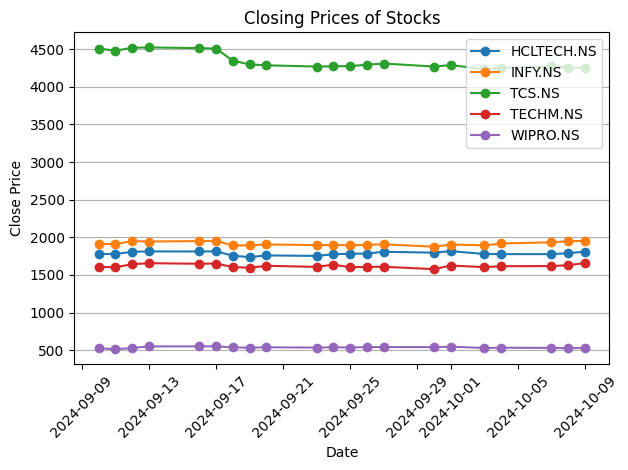

In [19]:
for ticker in df_2['Ticker'].unique():
    #print(ticker)
    subset = df_2[df_2['Ticker'] == ticker]
    plt.plot(subset.index, subset['Close'], label=ticker, marker = 'o')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices of Stocks')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.legend()  
plt.tight_layout()
plt.show()

### 3. **What are the average daily closing prices for each IT Company?**


In [20]:
df_3 = data_load
df_3.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object

In [21]:
df_3 = df_3[(df_3.index <= current_date) & (df_3.index >= days_30_current_date) ]
#df_3.reset_index()
#df_3.set_index('Ticker', inplace=True)


In [22]:
df_3[df_3.Ticker == 'TCS.NS']['Close'].mean()

4343.323823474702

       Ticker   Mean Close
0      TCS.NS  4343.323823
1     INFY.NS  1916.016671
2    WIPRO.NS   536.711908
3  HCLTECH.NS  1785.895235
4    TECHM.NS  1620.257150


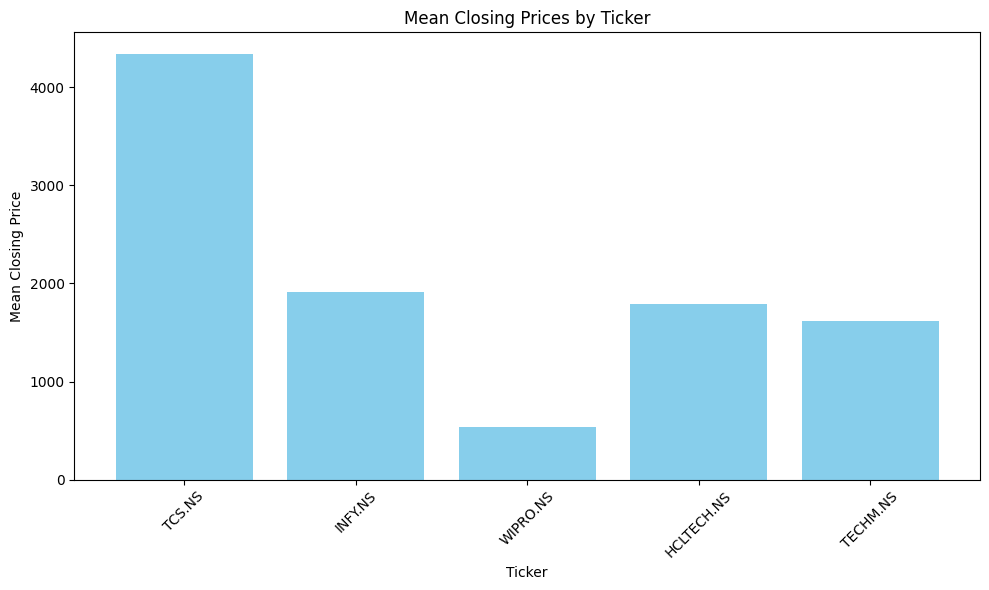

In [23]:
results = []
for ticker in df_3.Ticker.unique():
    mean_close = df_3[df_3.Ticker == ticker]['Close'].mean()
    results.append({'Ticker': ticker, 'Mean Close': mean_close})
mean_close_df = pd.DataFrame(results)
print(mean_close_df)

plt.figure(figsize=(10, 6))
plt.bar(mean_close_df['Ticker'], mean_close_df['Mean Close'], color='skyblue')
plt.xlabel('Ticker')
plt.ylabel('Mean Closing Price')
plt.title('Mean Closing Prices by Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. **How has trading volume changed over time for each IT Company?**


In [24]:
df_4 = data_load


In [25]:
# Get the current date
current_date = pd.Timestamp.now()
# Calculate the date 30 days prior
days_365_current_date = current_date - pd.Timedelta(days=365)
# Print the results
print("Current date:", current_date.strftime('%Y-%m-%d'))
print("Date 365 days ago:", days_365_current_date.strftime('%Y-%m-%d'))

Current date: 2024-10-09
Date 365 days ago: 2023-10-10


TCS.NS
INFY.NS
WIPRO.NS
HCLTECH.NS
TECHM.NS


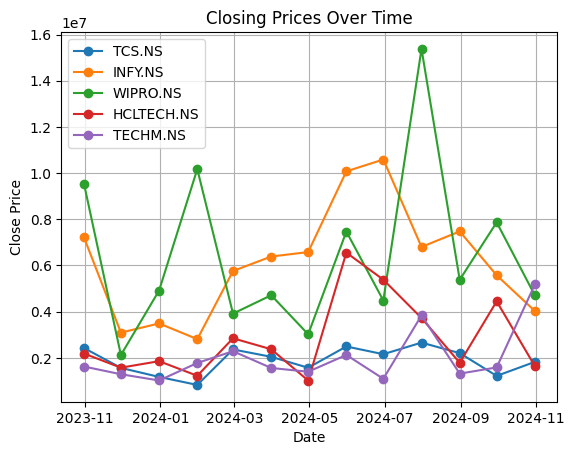

In [26]:

for ticker in df_4['Ticker'].unique():
    print(ticker)
    
    ticker_data = df_4[(df_4.index <= current_date) & 
                       (df_4.index >= days_365_current_date) & 
                       (df_4['Ticker'] == ticker)]
    
    filtered_set = ticker_data.resample('ME').first()

    plt.plot(filtered_set['Volume'], label=ticker,marker ='o')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Prices Over Time')
plt.grid()
plt.show()


### 5. **What is the distribution of daily returns for each IT Company?**


In [27]:
df_5 = data_load
df_5['Price_change'] = 0.0

In [28]:
# Get the current date
current_date = pd.Timestamp.now()
# Calculate the date 30 days prior
date_10_days_ago  = current_date - pd.Timedelta(days=10)
# Print the results
print("Current date:", current_date.strftime('%Y-%m-%d'))
print("Date 10 days ago:", date_10_days_ago .strftime('%Y-%m-%d'))

Current date: 2024-10-09
Date 10 days ago: 2024-09-29


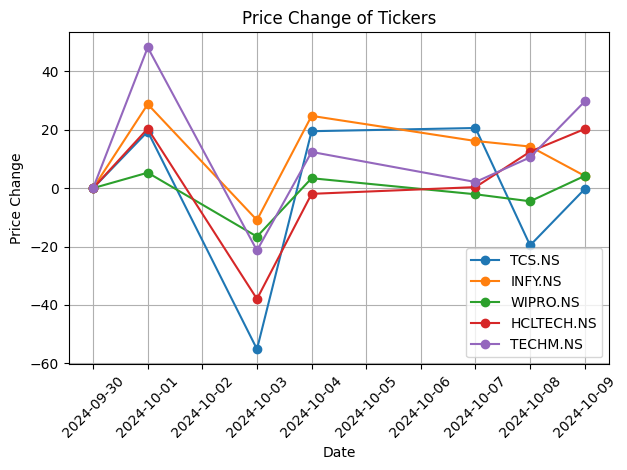

In [29]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on the date range
test = df_5[(df_4.index <= current_date) & (df_4.index >= date_10_days_ago)][['Close', 'Price_change', 'Ticker']]

# Ensure Price_change column is initialized to zero
test['Price_change'] = 0.0

# Iterate over each unique ticker
for ticker in test['Ticker'].unique():
    ticker_data = test[test['Ticker'] == ticker]
    
    start_date = ticker_data.index.min()
    end_date = ticker_data.index.max()
    
    # Calculate price changes
    for i in ticker_data.index:
        if i > start_date:
            loc = ticker_data.index.get_loc(i)
            
            if loc > 0:  # Ensure there's a previous row
                previous_close = ticker_data.iloc[loc - 1]['Close']
                current_close = ticker_data.loc[i]['Close']
                price_difference = current_close - previous_close
                ticker_data.loc[i, 'Price_change'] = price_difference
    
    # Plot Price Change
    plt.plot(ticker_data.index, ticker_data['Price_change'], marker='o',  label=ticker)
    
plt.title('Price Change of Tickers')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.xticks(rotation=45)  
plt.grid()
plt.tight_layout()
plt.show()


 ### 6. **Which IT Company has the highest average closing price?**


In [30]:
# Get the current date
current_date = pd.Timestamp.now()
# Calculate the date 30 days prior
date_365_days_ago  = current_date - pd.Timedelta(days=365)
# Print the results
print("Current date:", current_date.strftime('%Y-%m-%d'))
print("Date 365 days ago:", date_365_days_ago .strftime('%Y-%m-%d'))

Current date: 2024-10-09
Date 365 days ago: 2023-10-10


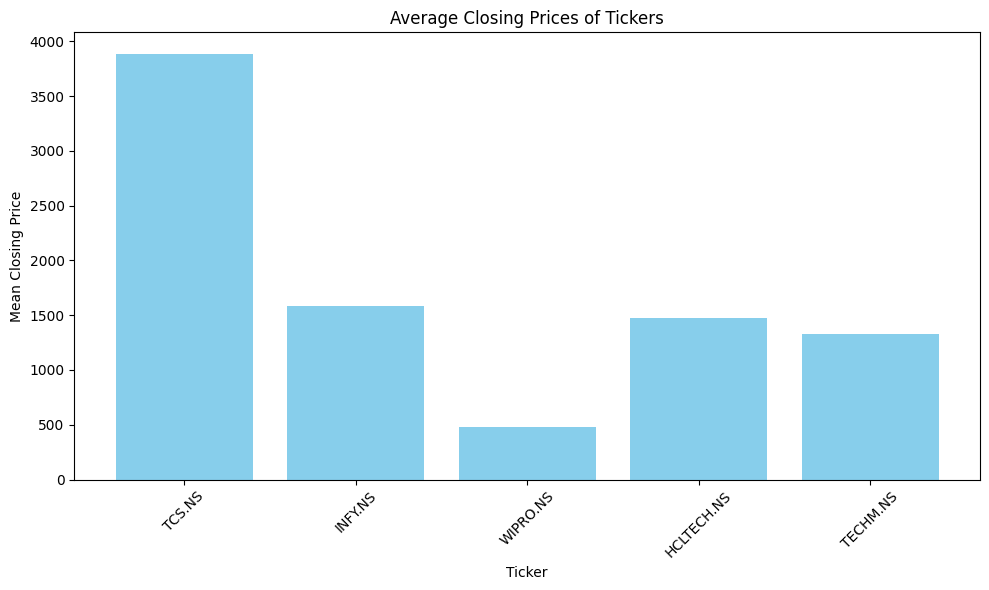

In [31]:
df_6 = data_load
avg_list= []
for ticker in df_6['Ticker'].unique():
    test = df_6[(df_6.index <= current_date) & (df_6.index >= date_365_days_ago) & (df_6['Ticker'] == ticker)]

    test = test.resample('ME').first()
    test = test[['Ticker', 'Close']]
    mean_close= test['Close'].mean()
    avg_list.append({'Ticker': ticker, 'Mean Close': mean_close})
    avg_list
    df_avg_list = pd.DataFrame(avg_list)
    df_avg_list
plt.figure(figsize=(10, 6))
plt.bar(df_avg_list['Ticker'], df_avg_list['Mean Close'], color='skyblue', %ed)
plt.xlabel('Ticker')
plt.ylabel('Mean Closing Price')
plt.title('Average Closing Prices of Tickers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 8. **Which IT Companys have the highest correlation in their daily returns?**


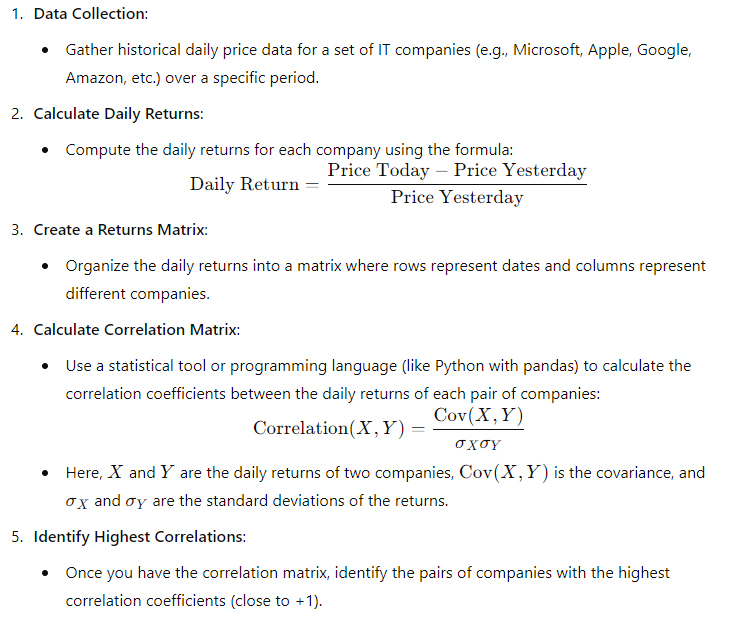